<a href="https://colab.research.google.com/github/Ninja7328/Encryptix/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [2]:
# Load the dataset
advertising = pd.read_csv("advertising.csv")

# Inspect the dataset
advertising.head(), advertising.info(), advertising.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(      TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3   12.0
 3  151.5   41.3       58.5   16.5
 4  180.8   10.8       58.4   17.9,
 None,
                TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000)

In [3]:
# Check for missing values
missing_values = advertising.isnull().sum() * 100 / advertising.shape[0]
print("Missing values percentage:\n", missing_values)


Missing values percentage:
 TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64


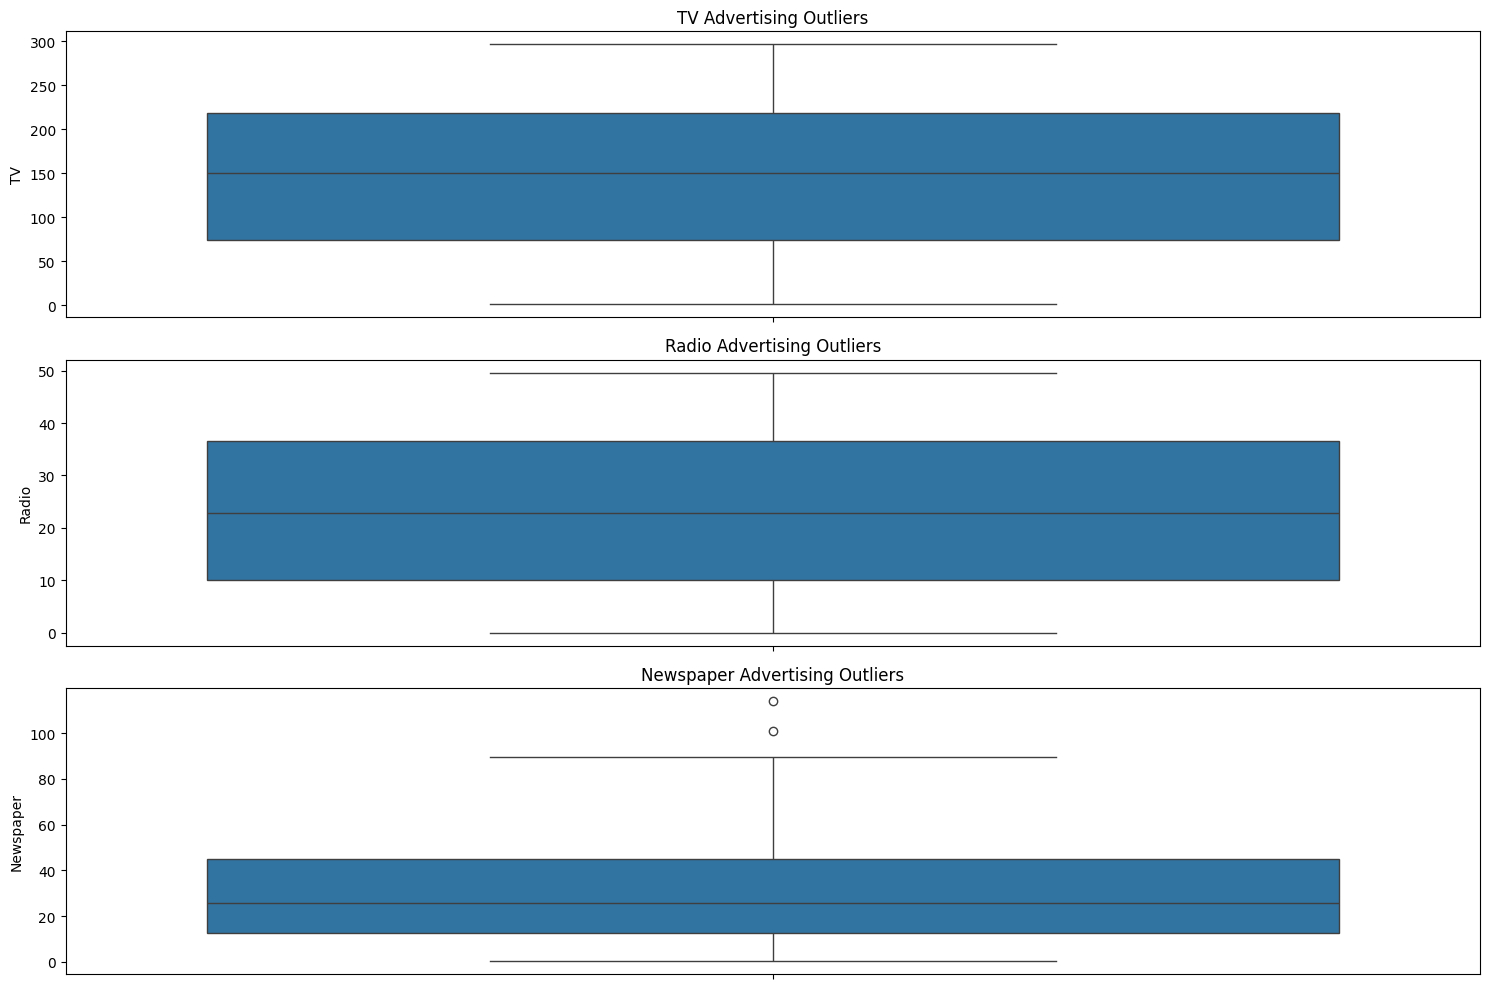

In [4]:
# Plotting boxplots to detect outliers
fig, axs = plt.subplots(3, figsize=(15, 10))
sns.boxplot(advertising['TV'], ax=axs[0])
axs[0].set_title('TV Advertising Outliers')
sns.boxplot(advertising['Radio'], ax=axs[1])
axs[1].set_title('Radio Advertising Outliers')
sns.boxplot(advertising['Newspaper'], ax=axs[2])
axs[2].set_title('Newspaper Advertising Outliers')
plt.tight_layout()
plt.show()


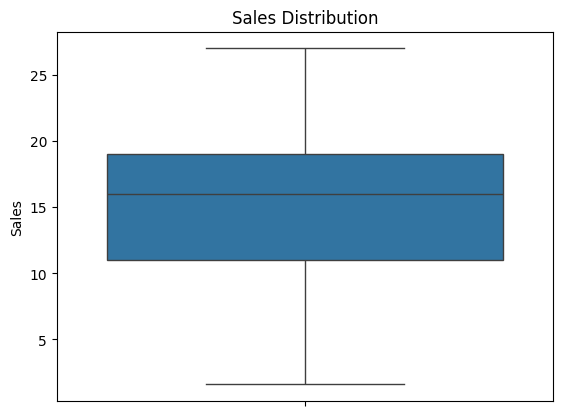

In [7]:
# Boxplot for Sales Distribution
sns.boxplot(advertising['Sales'])
plt.title('Sales Distribution')
plt.show()


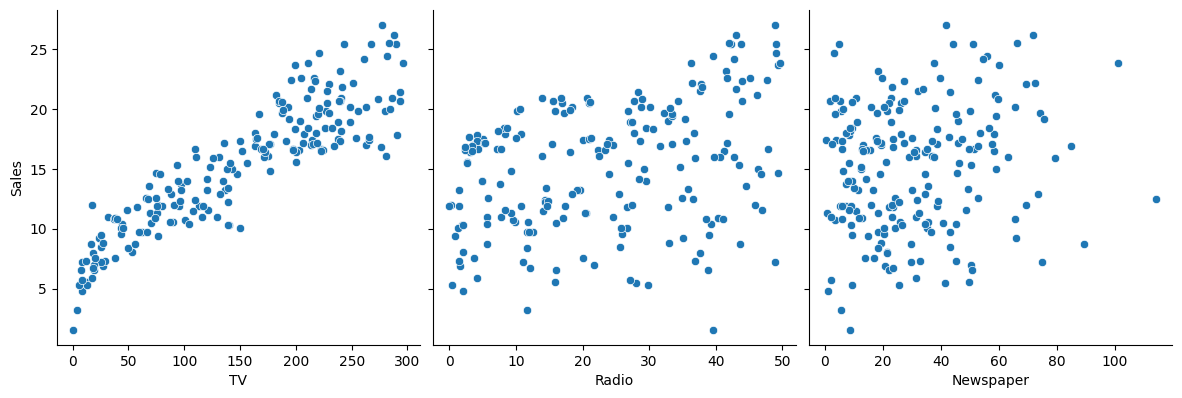

In [8]:
# Pairplot to show relationships between variables
sns.pairplot(advertising[['TV', 'Radio', 'Newspaper', 'Sales']], x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

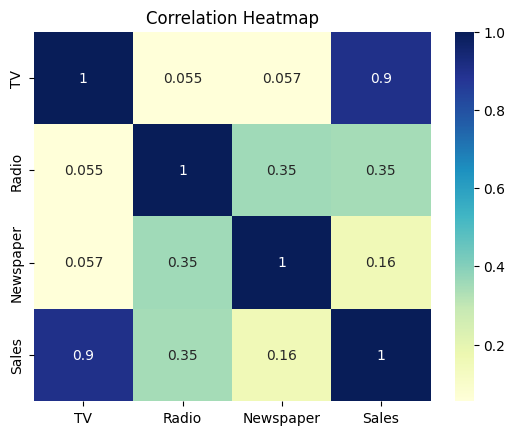

In [9]:
# Correlation Heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Prepare data for model
X = advertising[['TV']]
y = advertising['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Coefficients: [0.05454575]
Intercept: 6.948683200001357
Mean squared error: 4.077556371826948
Root Mean Squared Error (RMSE): 2.019296008966231
Coefficient of determination (R^2): 0.7921031601245662


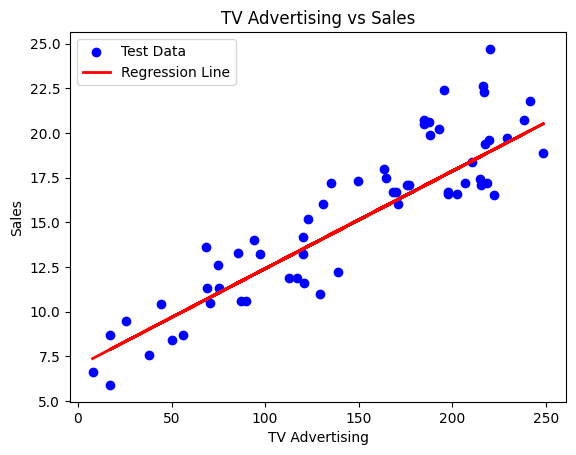

In [11]:
# Evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()


In [12]:
# Add constant to the model for statsmodels
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print model summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        20:14:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

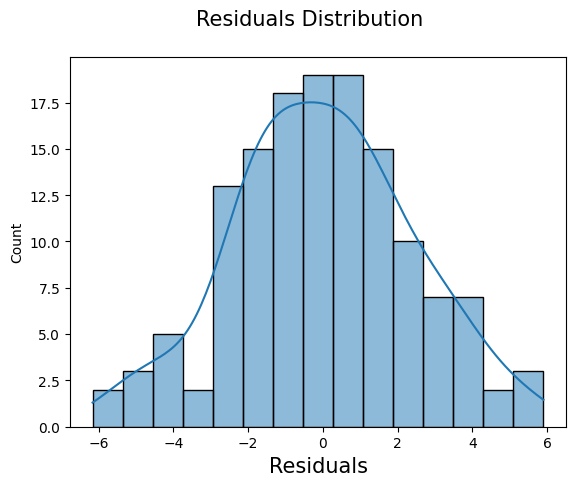

In [14]:
# Predictions and residuals
y_train_pred = model_sm.predict(X_train_sm)
residuals = y_train - y_train_pred

# Plot residuals distribution
fig = plt.figure()
sns.histplot(residuals, bins=15, kde=True)
fig.suptitle('Residuals Distribution', fontsize=15)
plt.xlabel('Residuals', fontsize=15)
plt.show()


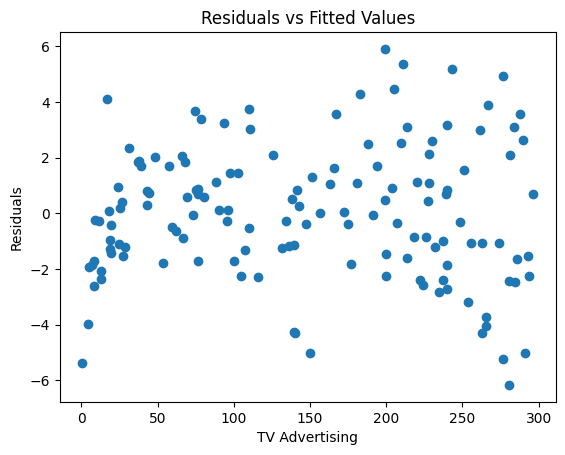

In [15]:
# Plot residuals vs fitted values
plt.scatter(X_train, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('TV Advertising')
plt.ylabel('Residuals')
plt.show()

Test Set RMSE: 2.019296008966232
Test Set R-squared: 0.792103160124566


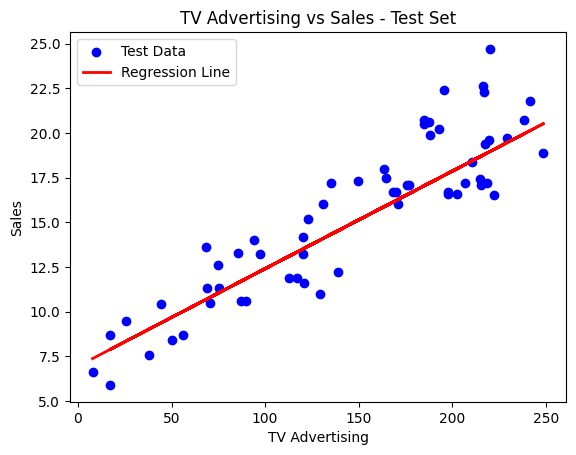

In [16]:
# Add constant to X_test for statsmodels
X_test_sm = sm.add_constant(X_test)

# Predict and evaluate on the test set
y_test_pred = model_sm.predict(X_test_sm)
print("Test Set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test Set R-squared:", r2_score(y_test, y_test_pred))

# Plot regression line for Test Set predictions
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales - Test Set')
plt.legend()
plt.show()
